In [1]:
import ray
import sys
from skimage import io
sys.path.append("../src")
import os
os.environ["PYTHONPATH"] = os.environ.get("PYTHONPATH", "") + os.pathsep + "../src"
from actors.object_detection import ObjectDetector

import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
ray.init()

Waiting for redis server at 127.0.0.1:24946 to respond...
Waiting for redis server at 127.0.0.1:35086 to respond...
Starting local scheduler with the following resources: {'CPU': 12, 'GPU': 1}.

View the web UI at http://localhost:8889/notebooks/ray_ui51875.ipynb?token=2b52ee6ca1ef8f167dc31c78f4da2b1b2db86777ac6ae777



{'local_scheduler_socket_names': ['/tmp/scheduler58753647'],
 'node_ip_address': '127.0.0.1',
 'object_store_addresses': [ObjectStoreAddress(name='/tmp/plasma_store27828117', manager_name='/tmp/plasma_manager2061368', manager_port=40357)],
 'redis_address': '127.0.0.1:24946',
 'webui_url': 'http://localhost:8889/notebooks/ray_ui51875.ipynb?token=2b52ee6ca1ef8f167dc31c78f4da2b1b2db86777ac6ae777'}

In [3]:
od = ObjectDetector.remote("../data/object_detection/ssd_mobilenet_v1_coco_2017_11_17/frozen_inference_graph.pb",
                           "../src/thirdparty/models/research/object_detection/data/mscoco_label_map.pbtxt", 90)

In [4]:
img = io.imread("http://openmindjournals.com/wp-content/uploads/2014/11/OMJ-New-york-street-style-manhattan-.jpg")

In [5]:
out = ray.get(od.detect_objects.remote(img))

In [6]:
index_to_category = {
    0: "person",
    1: "bicycle",
    2: "car",
    3: "motorcycle",
    4: "bus",
    5: "train",
    6: "truck",
    7: "boat",
    8: "traffic light",
    9: "fire hydrant",
    10: "stop sign",
    11: "parking meter",
    12: "animal"
}

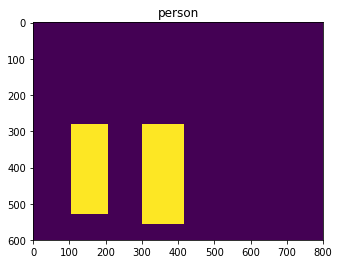

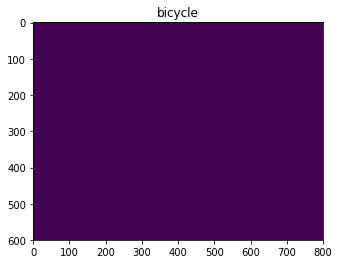

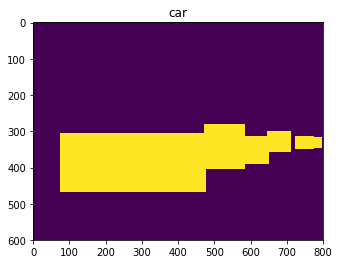

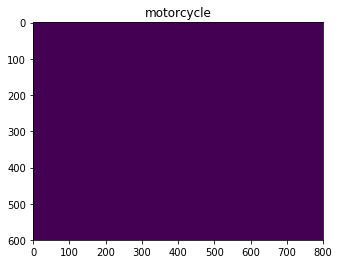

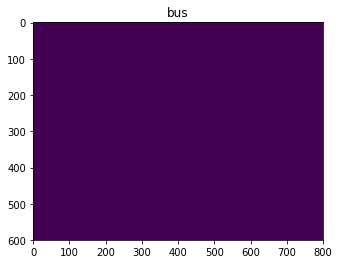

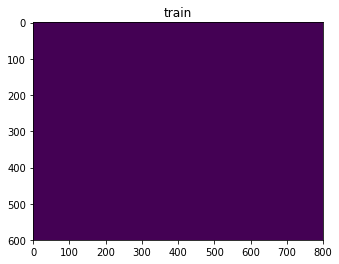

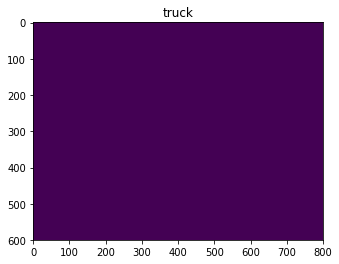

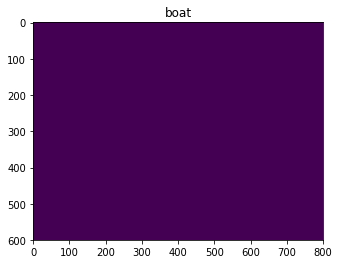

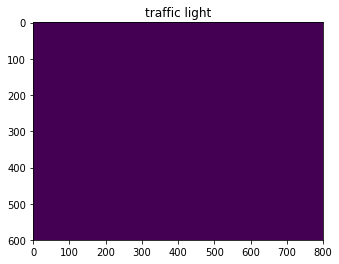

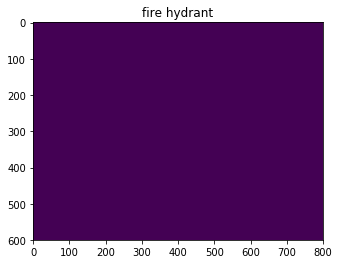

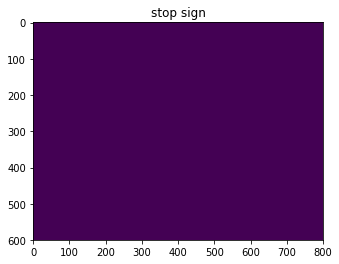

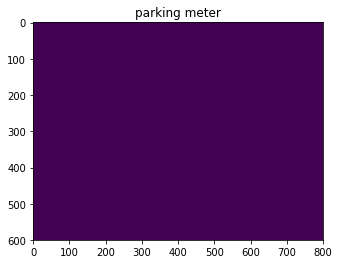

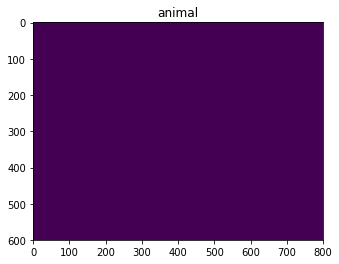

In [7]:
for i in range(out.shape[2]):
    plt.title(index_to_category[i])
    plt.imshow(out[:,:,i])
    plt.show()